#  Third Lab-work Image Processing MAIA 2021

In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import string
import time

from scipy import signal
from PIL import Image

# 3

## 3.1
Done by hand

## 3.2

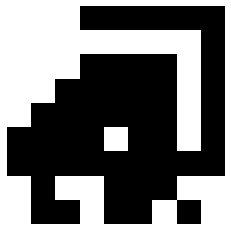

In [29]:
# Load the image
im = np.array([
    [20, 20, 20, 10, 10, 10, 10, 10, 10],
    [20, 20, 20, 20, 20, 20, 20, 20, 10],
    [20, 20, 20, 10, 10, 10, 10, 20, 10],
    [20, 20, 10, 10, 10, 10, 10, 20, 10],
    [20, 10, 10, 10, 10, 10, 10, 20, 10],
    [10, 10, 10, 10, 20, 10, 10, 20, 10],
    [10, 10, 10, 10, 10, 10, 10, 10, 10],
    [20, 10, 20, 20, 10, 10, 10, 20, 20],
    [20, 10, 10, 20, 10, 10, 20, 10, 20],
])
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [30]:
# Load the kernels
ka = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]])
kb = np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]])
kc = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
kd = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
ke = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kf = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
kg = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kh = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernels = [ka, kb, kc, kd, ke, kf, kg, kh]

In [43]:
# Comparing times between sckit image and cv2

# time_cv2 = []
# time_scikit = []
# for kernel in kernels:
#     for i in range(1000):
#         start = time.time()
#         out = signal.convolve2d(im, kernel, mode='same', boundary='fill', fillvalue=0)
#         time_cv2.append(time.time()-start)
        
#         start = time.time()
#         out = cv2.filter2D(im.astype('float32'), -1, kernel)
#         time_scikit.append(time.time()-start)
        
# print(f'Time with cv2: {np.mean(time_cv2)}')
# print(f'Time with scikit: {np.mean(time_scikit)}')

Time with cv2: 5.79303503036499e-06
Time with scikit: 5.3613185882568355e-06


In [44]:
for k, name in enumerate(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']):
    out = signal.convolve2d(im, kernels[k], mode='same', boundary='fill', fillvalue=0)
    print(f'Array filtered with kernel {name}')
    display(out)

Array filtered with kernel a


array([[-60, -40, -30, -30, -40, -40, -40, -30,   0],
       [-40,   0,  10,  10,   0,   0, -10,   0,  30],
       [-40,  10,  30,  30,  20,  20,   0,  10,  40],
       [-30,  30,  30,  10,   0,   0, -20,   0,  40],
       [-10,  30,  10, -10, -10,   0, -20,   0,  40],
       [-10,  10,   0, -10,   0,  10, -10,  10,  40],
       [-30, -10, -20, -10,  10,  10, -10, -10,  20],
       [-30,   0, -20,   0,  10, -10, -20, -20,  20],
       [ 10,  40,  20,  40,  40,  10,  20,  30,  50]])

Array filtered with kernel b


array([[  0, -40, -50, -50, -40, -40, -40, -40, -40],
       [ 40,   0, -10, -10,   0,   0,   0, -20, -40],
       [ 40,   0,   0,  10,  20,  20,  30,   0, -40],
       [ 40,   0,   0,   0,   0,   0,  20,   0, -40],
       [ 40,   0,   0,   0, -10, -10,  20,   0, -40],
       [ 30,   0,   0,  10,   0, -10,  20,  10, -30],
       [ 10, -10, -10, -10,   0,   0,  10,   0, -40],
       [ 10, -10,  10, -20, -20,   0,   0,   0, -40],
       [ 40,  20,  50,  30,  10,  30,  30,  40,  10]])

Array filtered with kernel c


array([[ 40,  60,  40,  20,   0,   0,   0,  10,  10],
       [  0,   0,  20,  40,  60,  60,  50,  30,  10],
       [  0,  10,   0, -10, -30, -30, -20, -10,   0],
       [ 10,   0,   0, -10,   0,   0,   0,   0,   0],
       [  0,   0, -10, -10, -10, -10,   0,   0,   0],
       [-10, -10,   0,  20,  20,  20,  10,  10,  10],
       [-10, -20, -20, -30, -20, -10, -20, -30, -30],
       [ 10,  30,  30,  30,  10, -10,  10,  20,  30],
       [ 30,  30,  30,  30,  40,  50,  40,  50,  20]])

Array filtered with kernel d


array([[ 40,   0,  10, -10,   0,   0,   0,  10,  10],
       [ 60,   0,  20, -20,   0,   0, -10,  30,  10],
       [ 60,  10,   0, -10,   0,   0, -20,  50,   0],
       [ 70,   0,   0, -10,   0,   0, -30,  60,   0],
       [ 60,   0, -10, -10,  20, -10, -30,  60,   0],
       [ 50, -10,   0, -10,  20, -10, -20,  40,  10],
       [ 50, -20,  10,   0,  10, -10, -20,  30,  30],
       [ 70, -30,   0,  30, -20, -10,  10, -10,  60],
       [ 60, -30,   0,  30, -20, -10,  10, -10,  50]])

Array filtered with kernel e


array([[100,  60,  70, -10,   0,   0,   0,  10,  40],
       [ 60,   0,  20,  40,  60,  60,  50,  60,  10],
       [ 60,  10,  30, -40, -30, -30, -50,  50,   0],
       [ 70,  30, -30, -10,   0,   0, -30,  60,   0],
       [ 90, -30, -10, -10, -10, -10, -30,  60,   0],
       [ 20, -10,   0, -10,  80, -10, -20,  70,  10],
       [ 20, -20, -20, -30, -20, -10, -20, -30,   0],
       [100, -30,  60,  60, -20, -10, -20,  50,  90],
       [120,   0,   0,  90,  10,  20, 100, -10, 110]])

Array filtered with kernel f


array([[ 80, 120, 110, 100,  90,  90,  90,  80,  50],
       [120, 180, 160, 140, 120, 120, 130, 120,  80],
       [120, 170, 150, 130, 120, 120, 140, 130,  90],
       [110, 150, 120, 100,  90,  90, 120, 120,  90],
       [ 90, 120, 100, 100, 100, 100, 120, 120,  90],
       [ 70, 100,  90, 100, 100, 100, 110, 110,  80],
       [ 70, 110, 110, 120, 110, 100, 110, 120,  90],
       [ 80, 120, 120, 120, 110, 100, 110, 130,  90],
       [ 60,  90,  90,  90,  80,  70,  80, 100,  70]])

Array filtered with kernel g


array([[-40,   0,  10,  10,   0,   0,   0,  10,  30],
       [-60,   0,  20,  20,   0,   0, -10,  10,  50],
       [-60,  10,  20,  10,   0,   0, -20,  10,  60],
       [-50,  20,  20,  10,   0,   0, -30,   0,  60],
       [-40,  20,  10, -10,   0,  10, -30,   0,  60],
       [-30,  10,   0, -10,   0,  10, -20,   0,  50],
       [-30,   0, -10,   0,  10,  10, -20, -10,  50],
       [-30,  10, -20,  10,  20, -10, -10, -10,  40],
       [-20,  10, -20,  10,  20, -10, -10, -10,  30]])

Array filtered with kernel h


array([[ 40,  20,  30, -10,   0,   0,   0,   0,  20],
       [ 20,   0,   0,  20,  20,  20,  20,  20,   0],
       [ 20,   0,  20, -20, -10, -10, -20,  20,   0],
       [ 20,  20, -20,   0,   0,   0, -10,  20,   0],
       [ 40, -20,   0,   0, -10,   0, -10,  20,   0],
       [  0,   0,   0, -10,  40, -10, -10,  30,   0],
       [  0,   0, -10, -10, -10,   0,   0, -20,   0],
       [ 40, -20,  30,  20, -10,   0, -20,  30,  30],
       [ 50,   0, -10,  40,   0,   0,  50, -20,  50]])

## 3.3

- Mask a): It can be used to identify borders in the 45° diagonal
- Mask b): It can be used to identify borders in the -45° diagonal
- Mask c): It can be used to identify horizontal borders.
- Mask d): It can be used to identify vertical borders.
- Mask e): It can be used to identify omnidirectional borders (contours). It is a Laplacian filter, so it's also doing a smoothing of the image at the same time of the border detection. This results in a better highlight of contours ignoring noise (high frequencies)
- Mask f): It is a smoothing/blurring filter, but as it's not divided by the total numer of values in the kernel the resulting image will also have an increase in intensity.
- Mask g): It can be used to identify vertical borders.
- Mask h): It can be used to identify veritcal and horizontal borders (contours). It is also Laplacian filter, so it's also doing a smoothing of the image at the same time of the border detection. This results in a better highlight of contours ignoring noise (high frequencies)

## 3.4

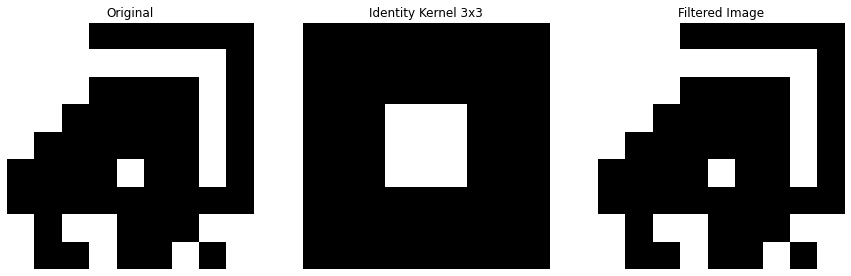

In [46]:
kernel = np.zeros((3,3))
kernel[1,1] = 1
out = signal.convolve2d(im, kernel, mode='same', boundary='fill', fillvalue=0)
if (im == out).all():
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    ax[0].set_title('Original')
    ax[0].imshow(im, cmap='gray')
    ax[0].axis('off')
    ax[1].set_title('Identity Kernel 3x3')
    ax[1].imshow(kernel, cmap='gray')
    ax[1].axis('off')
    ax[2].set_title('Filtered Image')
    ax[2].imshow(out, cmap='gray')
    ax[2].axis('off')

## 3.5

In [7]:
im = scipy.io.loadmat('./mandrill.mat') 
# The mat file just contains a unique matrix of floats, it doesn't proide the LUT, so it's ignored and 
# the .tiff image is used

In [53]:
im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)

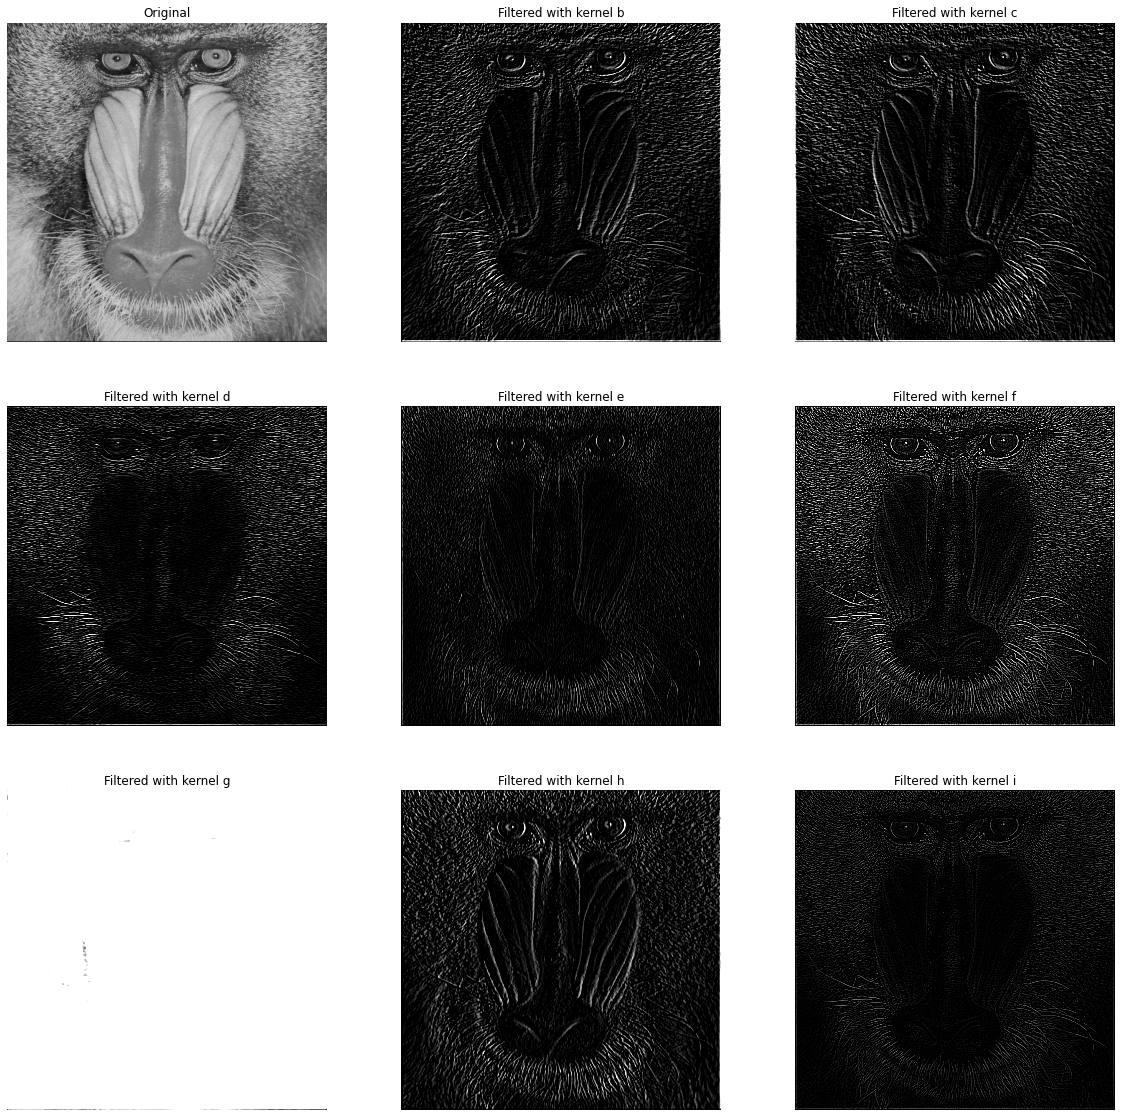

In [87]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
alphabet = string.ascii_lowercase
for n, kernel in enumerate(kernels):
    if n == 0:
        title = 'Original'
        ax[n//3, n%3].imshow(im, cmap='gray', vmin=0, vmax=255)
        ax[0,0].axis('off')
    else:
        title = f'Filtered with kernel {alphabet[n]}'
        ax[n//3, n%3].imshow(signal.convolve2d(im, kernel), cmap='gray', vmin=0, vmax=255)
    ax[n//3, n%3].set_title(title)
    ax[n//3, n%3].axis('off')

## 3.6

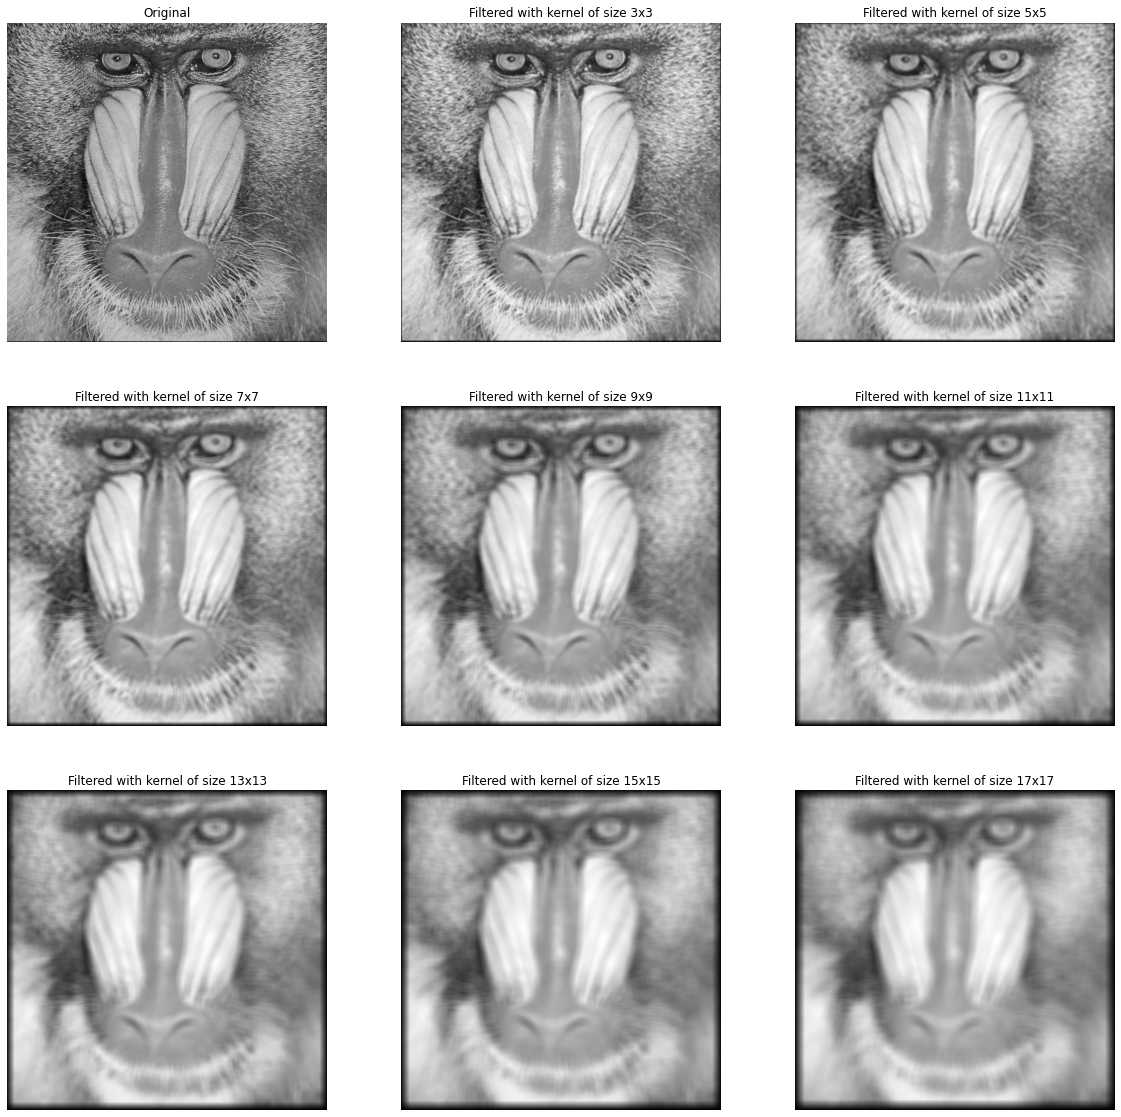

In [98]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
for i, k in enumerate(range(1,18,2)):
    kernel = np.ones((k,k))/(k^2)
    if i == 0:
        title = 'Original'
        ax[i//3, i%3].imshow(im, cmap='gray', vmin=0, vmax=255)
    else:
        title = f'Filtered with kernel of size {k}x{k}'
        ax[i//3, i%3].imshow(signal.convolve2d(im, kernel), cmap='gray')
    ax[i//3, i%3].set_title(title)
    ax[i//3, i%3].axis('off')

Whith a kernel of size 9x9 the whishkers, then with a kernel of size 17x17 the wishkers can distinguished at all.

## 3.7

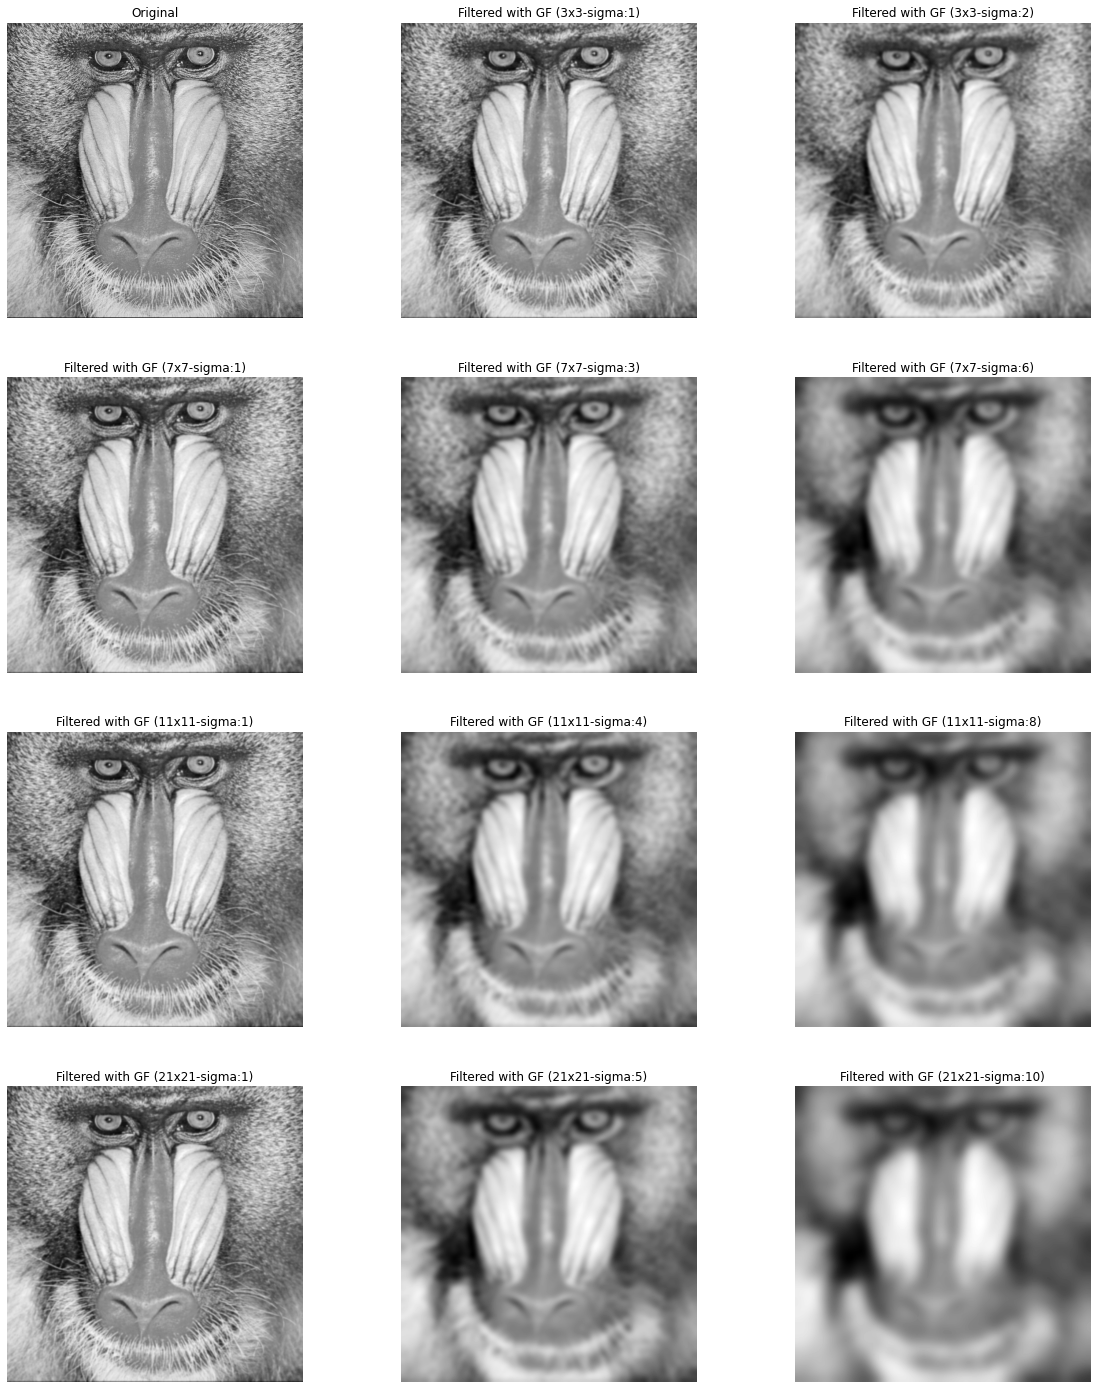

In [94]:
fig, ax = plt.subplots(4, 3, figsize=(20,25))
kernel_sigmas = {
    3: [0.5, 1, 2],
    7: [1, 3, 6],
    11: [1, 4, 8],
    21: [1, 5, 10],
}
for i, ks in enumerate(kernel_sigmas.keys()):
    for j in range(3):
        if (i==0) and (j==0):
            title = f'Original'
            ax[i,j].imshow(im, cmap='gray')
        else:
            sigma = kernel_sigmas[ks][j]
            ax[i, j].imshow(scipy.ndimage.gaussian_filter(im, sigma, mode='mirror'), cmap='gray')
            title = f'Filtered with GF ({ks}x{ks}-sigma:{sigma})'
        ax[i, j].set_title(title)
        ax[i, j].axis('off')

The wishkers can't be distinguished with the kernels:
- 7x7 --> sigma: 6
- 11x11 --> sigma: 4 and sigma: 8
- 21x21 --> sigma: 5 and sigma: 10

## 3.8

The available filters in matlab's function are:

- h = fspecial(**'average'**,hsize) returns an averaging filter h of size hsize.

- h = fspecial(**'disk'**,radius) returns a circular averaging filter (pillbox) within the square matrix of size 2**radius+1.

- h = fspecial(**'gaussian'**,hsize,sigma) returns a rotationally symmetric Gaussian lowpass filter of size hsize with standard deviation sigma. Not recommended. Use imgaussfilt or imgaussfilt3 instead.

- h = fspecial(**'laplacian'**,alpha) returns a 3-by-3 filter approximating the shape of the two-dimensional Laplacian operator, alpha controls the shape of the Laplacian.

- h = fspecial(**'log'**,hsize,sigma) returns a rotationally symmetric Laplacian of Gaussian filter of size hsize with standard deviation sigma.

- h = fspecial(**'motion'**,len,theta) returns a filter to approximate, once convolved with an image, the linear motion of a camera. len specifies the length of the motion and theta specifies the angle of motion in degrees in a counter-clockwise direction. The filter becomes a vector for horizontal and vertical motions. The default len is 9 and the default theta is 0, which corresponds to a horizontal motion of nine pixels.

- h = fspecial(**'prewitt'**) returns a 3-by-3 filter that emphasizes horizontal edges by approximating a vertical gradient. To emphasize vertical edges, transpose the filter h'.

        [ 1  1  1 
          0  0  0 
         -1 -1 -1 ]

- h = fspecial(**'sobel'**) returns a 3-by-3 filter that emphasizes horizontal edges using the smoothing effect by approximating a vertical gradient. To emphasize vertical edges, transpose the filter h'.

        [ 1  2  1 
          0  0  0 
         -1 -2 -1 ]

##### In python we can generate them as:

In [109]:
from skimage import morphology, filters
from scipy import ndimage

In [127]:
def apply_8_filters(im):
    fig, ax = plt.subplots(3, 3, figsize=(20,20))
    filters_ = ['None', 'Average', 'Disk', 'Gaussian', 'Laplacian', 'LoG', 'Motion', 'Prewitt','Sobel']
    for n, kernel in enumerate(filters_):
        if n == 0:
            title = 'Original'
            ax[n//3, n%3].imshow(im, cmap='gray', vmin=0, vmax=255)
            ax[0,0].axis('off')
        else:
            title = f'{kernel} filter'
            if kernel =='Average':
                filtered = filters.rank.mean(im, selem=np.ones((7,7)))
            elif kernel == 'Disk':
                filtered = filters.rank.mean(im, selem=morphology.disk(7))
            elif kernel == 'Gaussian':
                filtered = ndimage.gaussian_filter(im, 3)
            elif kernel == 'Laplacian':
                filtered = ndimage.laplace(im)
            elif kernel == 'LoG':
                filtered = ndimage.gaussian_laplace(im, 3)
            elif kernel == 'Motion':
                filtered = im
            elif kernel == 'Prewitt':
                filtered = ndimage.prewitt(im)
            elif kernel == 'Sobel':
                filtered = ndimage.sobel(im, 0)
            ax[n//3, n%3].imshow(filtered, cmap='gray', vmin=0, vmax=255)
            ax[n//3, n%3].set_title(title)
            ax[n//3, n%3].axis('off')

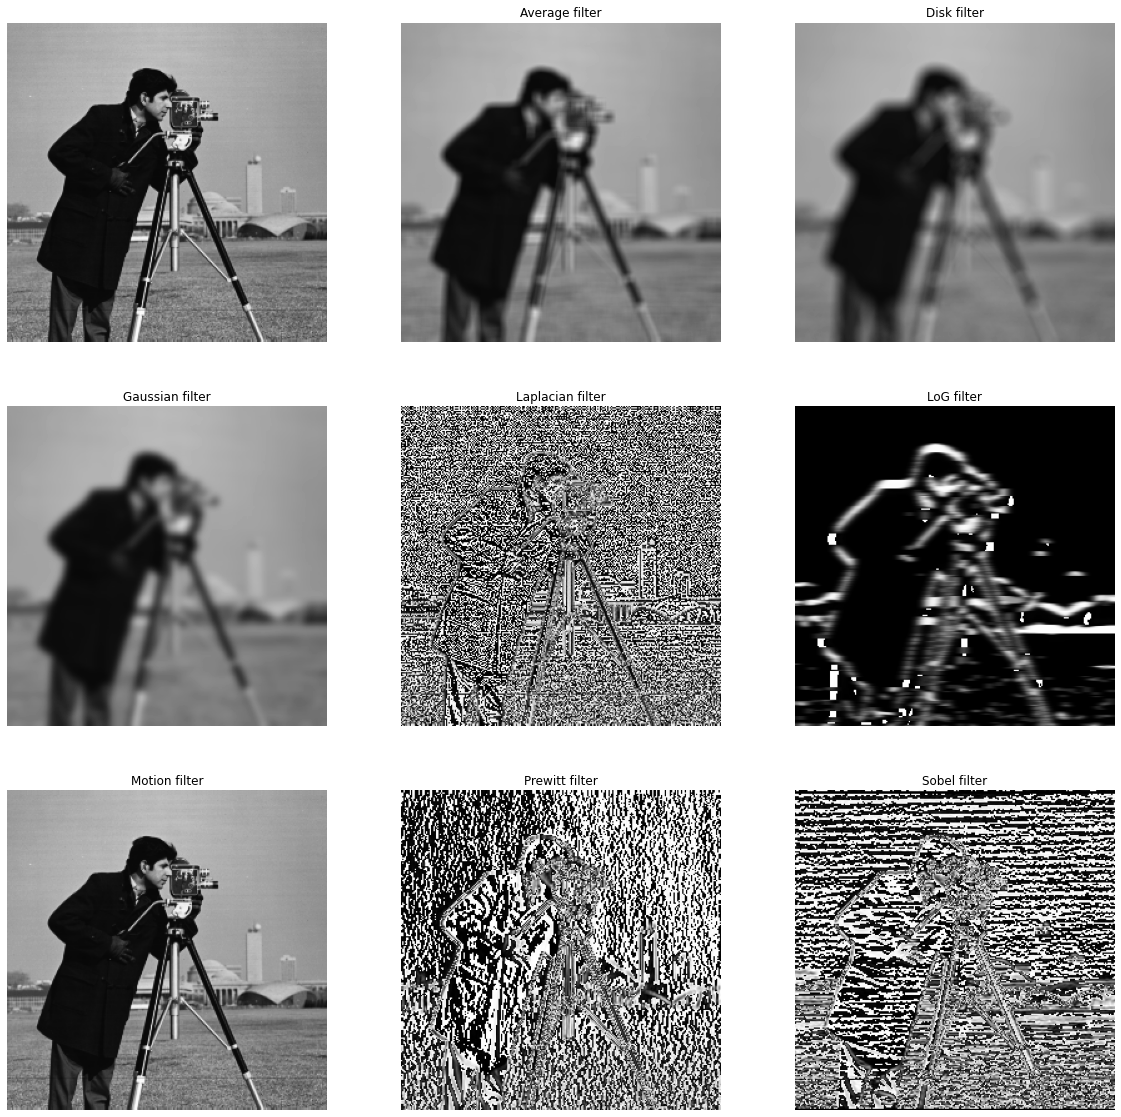

In [129]:
im = cv2.imread('../lab1/images/cameraman.png', cv2.IMREAD_GRAYSCALE)
apply_8_filters(im)

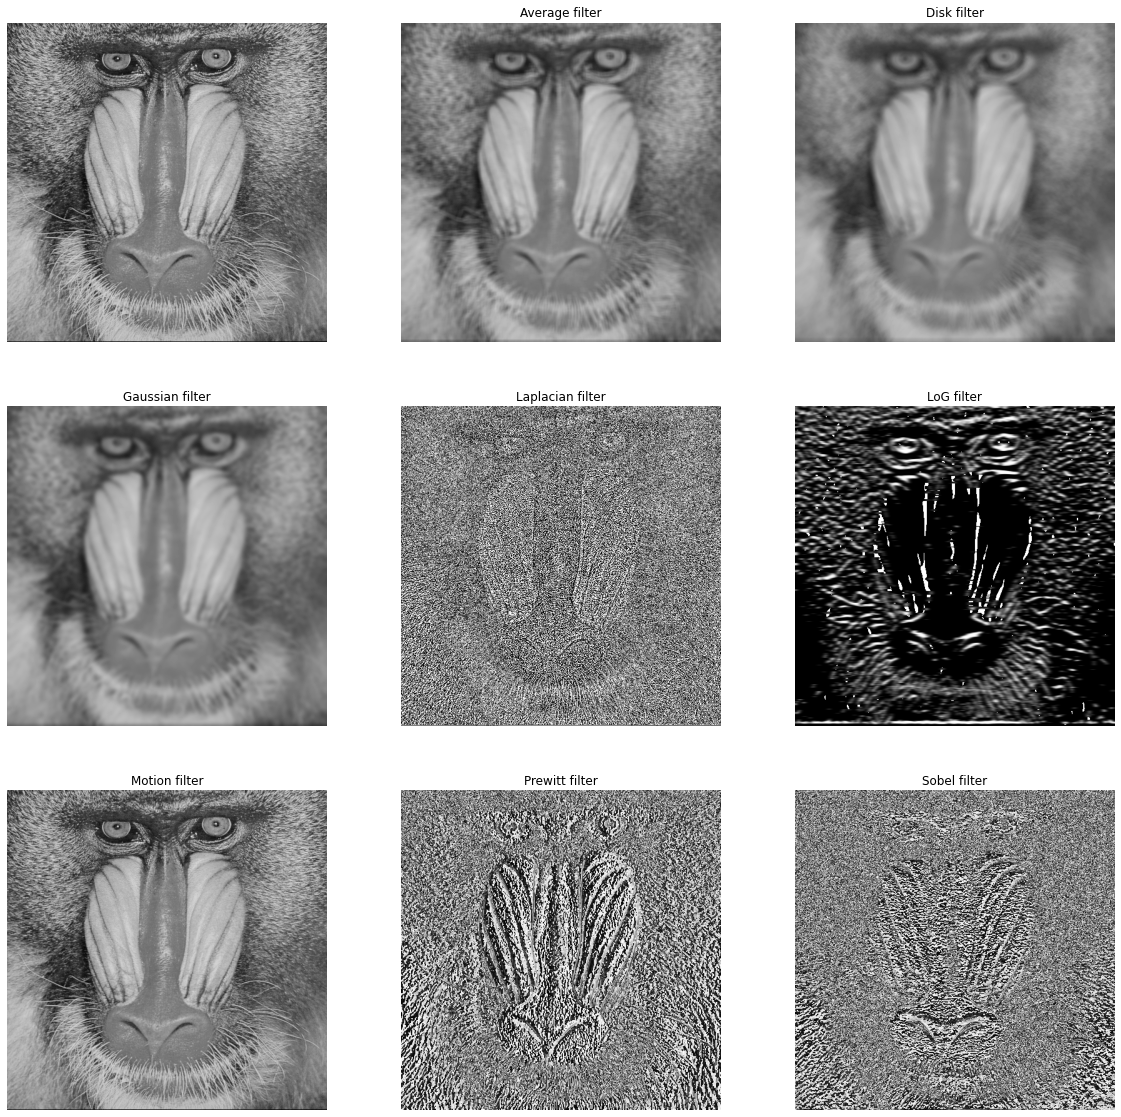

In [128]:
im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)
apply_8_filters(im)